# paper review : Arbitrary Style Transfer in Real-time with Adaptive Instance Normalization

+ 적응형 instance normalization을 이용해 임의의 style transfer를 진행하는 모델

# 1. 기존 모델 분석(neural style transfer)
<img src="https://drive.google.com/uc?id=1njU1K0jQfLRpuN2xlfTc_RMEIdrQ4qdf" width=900>

## 1.1 Content Loss
+ 그림의 내용(물체의 형태, 위치)에 대한 목적함수

$$L_{content}(\vec{p}, \vec{x}, l) = \cfrac{1}{2} \sum_{i, j}({F^l_{ij} - P^l_{ij}})^2$$

## 1.2 Style Loss
+ 그림의 스타일에 대한 목적함수
    + Gram matrix
$$G^l \in R^{N_l \times N_l}$$
$$G^l_{ij} = \sum_k{F^l_{ik} F^l_{jk}}$$  
        + $l$번째 레이어의 $i$와$j$번째 feature map의 correlation을 파악하는 척도.
        + matrix의 크기는 각 layer의 filter개수에 비례한다. 즉, 층이 깊어질 수록 Gram matrix의 크기가 커진다.
<img src="https://drive.google.com/uc?id=1USH78TL0w3uooFEcmDqBQLdgPc-3KV-0" height=100>

    + Loss function
$$E_l = \cfrac{1}{4N^2_l M^2_l}\sum_{i, j}{(G^l_{ij} - A^l_{ij})}$$
$$L_{style}(\vec{a}, \vec{x}) = \sum^L_{l=0}{w_l E_l})$$

### Gram matrix에서 값이 "크다"의 의미?

<img src="https://drive.google.com/uc?id=1NQrv-DSwu0KqOkAJQGkpQpOkB2-cx9LX" height=250>  

+ 주어진 이미지에서, 어떤 feature끼리 상관관계가 높은지 
+ ex) 대각선 정보와 물결정보가 상관관계 높다? -> 대각선 물결...(나름대로 내린 생각)  
<img src="https://drive.google.com/uc?id=1awDqxABAssnvLzdJ_1_2QTkPFmojkKrk" height=350>  

# 2. Gram matrix와 Instance Normalization과의 연관성

<img src="https://drive.google.com/uc?id=1AS6AWpBQ79RCovgROLwKgmGNO8bxsUwT" width=450>  
+ batch normalization은 각각의 feature map(채널마다)에 대해 normalization을 하는 반면, 
+ instance normalization은 각 instance(image)마다 normalization을 진행한다.
    + 서로 다른 image에대해 feature가 겹치지 않기 때문에, style을 더 잘 보존할 수 있다.



### (Inference) : Demystifying Neural Style Transfer
+ gram matrix가 어떻게 style 정보를 담을 수 있는지에 대한 수식적 연관성을 설명.

#### __Domain Adaptation vs style transfer__
+ domain adaptation이란?  
<img src="https://drive.google.com/uc?id=1e9mWG13779vM6jCfOi0YKM4xkf9M5xlJ" height=300>  
+ target으로 하는 데이터의 이미지가 충분하지 않거나, unlabeled되어있을 때 목표로 하는 domain과 연관있는 다른 source데이터로 학습을 시키고 source와 target의 domain 간격을 줄이는 기법.
    + domain간의 간격을 측정하는 방법으로 MMD(Maximum Mean Discrepancy).

+ __style transfer 역시 일종의 style(source)에 맞게 target을 adaptation한다고 이해할 수 있다!!__

해당 논문에서, Gausian kernel(내적을 보존하는 함수)을 사용해서 Gram matrix를 matching하는 것과 MMD를 줄이는 것이 동치관계임을 보였다.
__추가적으로, Normalization값을 matching하는 것 역시 동치임을 보였다. (이 아이디어가 앞으로 instance normalization에 사용된다.)__

### Conditional Instance Normalization
+ instance normalization에서 원하는 style을 조건부로 가져올 수 있다는 생각.

<img src="https://drive.google.com/uc?id=1Rdv4-D9tH9LbumagT6tidwbwK4rmt3gW" height=70>  
+ 해당 논문에서는 32개의 style마다 다른 감마와 베타를 가져와서 normalization을 진행하고, affine 변환을 진행했다.
    + affine 변환은 조금 생각해보면, 정규화의 역과정이라고 생각할 수 있다. 즉, 해당 style로 분포를 adapt한다고 생각할 수 있다.
+ 같은 conv 계층을 사용하지만, 감마 베타값만 다르게 해도 style이 다르게 적용된다는 사실..!!
    + __but, 원하는 style개수가 늘어날 수록 그에 비례해서 학습할 parameter 수가 늘어난다__

# 3. Adaptive Instance Normalization

+ idea : 기존의 IN(instance normalization)이 affine 변환을 통해 style을 가져온다면, 임의의 style로부터 affine 변환을 통해 style parameter를 가져올 수 있지 않을까? 

<img src="https://drive.google.com/uc?id=1-6bHcpTmZw81e6oyRvaVSjlJKlcmVVLu" height=350>  
<img src="https://drive.google.com/uc?id=1pYO_MIDK41Rpski7E_xsnHyxo1Eqyen7" height=80>  
+ T(c, s) : transfer network
+ c : content image
+ s : style image(임의의)
+ f : encoder (relu_4_1로 fix됨)(feature값을 추출하는 부분)
+ g : decoder
    + random init. 학습되어야 하는 모델. norm layer는 이전 단계에서 이미 되어서 다시 할 필요 x여서 제거하였다.
    + encoder와 대칭이 되는 모델.(conv -> upsampling)


$t = AdaIN(f(c), f(s))$  
$T(c,s) = g(t)$  
<img src="https://drive.google.com/uc?id=1YQ2QlDUev2BJzH2FEvdWgWXwbUz6P2Ct" height=250>  
+ $L_c$ : content loss.
    + f(g(t)) : output feature, t : target feature
+ $L_s$ : style loss.
    + $\phi_i$ : i번째 layer의 style feature 추출.(relu 1,2,3,4를 사용하니까...)

# 4. 모델 구현
+ "동빈나"님의 깃허브를 참고하였습니다.
+ https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice/blob/master/code_practices/AdaIN_Style_Transfer_Tutorial.ipynb

### 환결설정 및 라이브러리 불러오기

In [ ]:
# 필요한 PyTorch 라이브러리 불러오기
import torch
import torch.nn as nn

from torchvision import transforms
from torchvision.utils import save_image

from PIL import Image
from IPython.display import Image as display_image

#### <b>논문의 핵심 아이디어 구현 ① Instance Normalization을 위한 평균과 표준편차 계산</b>

* Instance Normalization을 구하기 위해 <b>각 이미지의 매 채널에 대하여 instence에 대한 평균(mean)과 표준편차(std) 값을 계산</b>합니다.
* <b>Feature Map의 형태</b>: (N: 배치 크기, C: 채널 크기, H: 높이, W: 너비)
* 입실론(epsilon)은 0으로 나누는 것을 예방하기 위한 작은 상수입니다.

In [ ]:
def calc_mean_std(feat, eps=1e-5):
    size = feat.size()
    assert (len(size) == 4)
    N, C = size[:2]
    feat_var = feat.view(N, C, -1).var(dim=2) + eps
    feat_std = feat_var.sqrt().view(N, C, 1, 1)
    feat_mean = feat.view(N, C, -1).mean(dim=2).view(N, C, 1, 1)
    return feat_mean, feat_std

### <b>논문의 핵심 아이디어 구현 ② Adaptive Instance Normalization</b>

* 본 논문에서 제시한 AdaIN을 구현합니다.
* <b>AdaIN</b>은 content feature의 스타일을 style feature의 스타일로 변경하는 연산으로 이해할 수 있습니다.

In [ ]:
def adaptive_instance_normalization(content_feat, style_feat):
    assert (content_feat.size()[:2] == style_feat.size()[:2])
    size = content_feat.size()
    style_mean, style_std = calc_mean_std(style_feat)
    content_mean, content_std = calc_mean_std(content_feat)

    # 평균(mean)과 표준편차(std)를 이용하여 정규화 수행
    normalized_feat = (content_feat - content_mean.expand(size)) / content_std.expand(size)
    # 정규화 이후에 style feature의 statistics를 가지도록 설정
    return normalized_feat * style_std.expand(size) + style_mean.expand(size)

#### <b>인코더 및 디코더 네트워크</b>

* <b>인코더(Encoder)</b>: VGG 형식의 네트워크를 사용하여 이미지로부터 특징(feature)을 추출(extract)합니다.
* <b>디코더(Decoder)</b>: 인코더와 유사한 네트워크이지만 <b>반대로 해상도(너비 X 높이)를 키우는 방식으로 동작</b>합니다.

#### <b>인코더(Encoder)</b>

* VGG 네트워크에서 맥스 풀링(max pooling)을 총 4번 진행하지만, Style Transfer에서는 ReLU4_1까지만 사용합니다.
    * 따라서 사실상 다운샘플링(downsampling)은 3번까지만 진행된다고 이해할 수 있습니다.

In [ ]:
# 인코더(Encoder) 정의
vgg = nn.Sequential(
    nn.Conv2d(3, 3, (1, 1)),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(3, 64, (3, 3)),
    nn.ReLU(), # relu1-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(), # relu1-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 128, (3, 3)),
    nn.ReLU(), # relu2-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(), # relu2-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 256, (3, 3)),
    nn.ReLU(), # relu3-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(), # relu3-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(), # relu3-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(), # relu3-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 512, (3, 3)),
    nn.ReLU(), # relu4-1, this is the last layer used
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu4-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu4-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu4-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu5-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu5-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(), # relu5-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU() # relu5-4
)

#### <b>디코더(Decoder)</b>

* 디코더는 인코더 네트워크를 반대로 뒤집은 것과 유사한 구조를 가집니다.
* 인코더 파트에서 3번의 다운샘플링(downsampling)을 거치므로, 디코더에서는 3번의 업샘플링(upsampling)을 거칩니다.

In [ ]:
# 디코더(Decoder) 정의
decoder = nn.Sequential(
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 256, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 128, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 64, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 3, (3, 3)),
)

#### <b>사전 학습된(Pre-trained) 모델 불러오기</b> 

In [ ]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Ebs6XES37otLgWW5cavCY9YByGOnXJD5wC0WZgQPp8vAJg?download=1 -O decoder.pth
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EXzxBZI0seBFuxucQjlShBEBtM7X5-Lmj-ceqZ5Fu96alA?download=1 -O vgg_normalised.pth

--2023-04-20 17:56:12--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Ebs6XES37otLgWW5cavCY9YByGOnXJD5wC0WZgQPp8vAJg?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/AdaIN%20Style%20Transfer/decoder.pth?ga=1 [following]
--2023-04-20 17:56:13--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/AdaIN%20Style%20Transfer/decoder.pth?ga=1
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 14023458 (13M) [application/octet-stream]
Saving to: ‘decoder.pth’

decoder.pth         100%[===================>]  13.37M  3.21MB/s    in 4.2s    



In [ ]:
decoder.eval()
vgg.eval()

vgg_path = './vgg_normalised.pth'
decoder_path = './decoder.pth'

decoder.load_state_dict(torch.load(decoder_path))
vgg.load_state_dict(torch.load(vgg_path))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)
decoder.to(device)

vgg = nn.Sequential(*list(vgg.children())[:31]) # ReLU4_1까지만 사용

#### <b>AdaIN Style Transfer 네트워크</b>

* 앞서 정의한 인코더와 디코더를 이용하는 하나의 네트워크를 정의합니다.
* 먼저 인코더(encoder)를 통해 feature map을 추출한 뒤에 AdaIN을 거쳐 Style Transfer를 수행합니다.
* 디코더는 처리된 feature를 입력받아 결과 이미지를 생성합니다.
* <b>본 실습에서 사용하지는 않지만</b> 아키텍처를 이해하기 위해 코드를 확인해 봅시다.

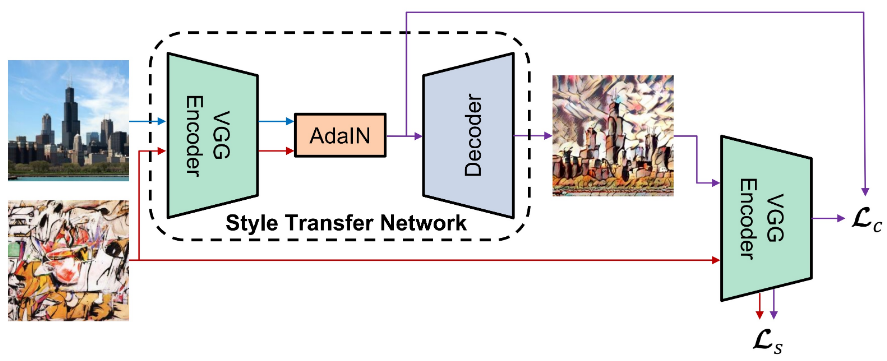

In [ ]:
class Net(nn.Module):
    def __init__(self, encoder, decoder):
        super(Net, self).__init__()
        enc_layers = list(encoder.children())
        self.enc_1 = nn.Sequential(*enc_layers[:4]) # input -> relu1_1
        self.enc_2 = nn.Sequential(*enc_layers[4:11]) # relu1_1 -> relu2_1
        self.enc_3 = nn.Sequential(*enc_layers[11:18]) # relu2_1 -> relu3_1
        self.enc_4 = nn.Sequential(*enc_layers[18:31]) # relu3_1 -> relu4_1
        self.decoder = decoder
        self.mse_loss = nn.MSELoss()

        # fix the encoder
        for name in ['enc_1', 'enc_2', 'enc_3', 'enc_4']:
            for param in getattr(self, name).parameters():
                param.requires_grad = False

    # extract relu1_1, relu2_1, relu3_1, relu4_1 from input image (중간 결과를 기록)
    def encode_with_intermediate(self, input):
        results = [input]
        for i in range(4):
            func = getattr(self, 'enc_{:d}'.format(i + 1))
            results.append(func(results[-1]))
        return results[1:]

    # extract relu4_1 from input image (최종 결과만 기록)
    def encode(self, input):
        for i in range(4):
            input = getattr(self, 'enc_{:d}'.format(i + 1))(input)
        return input

    # 콘텐츠 손실(feature 값 자체가 유사해지도록)
    def calc_content_loss(self, input, target):
        assert (input.size() == target.size())
        assert (target.requires_grad is False)
        return self.mse_loss(input, target)

    # 스타일 손실(feature의 statistics가 유사해지도록)
    def calc_style_loss(self, input, target):
        assert (input.size() == target.size())
        assert (target.requires_grad is False)
        input_mean, input_std = calc_mean_std(input)
        target_mean, target_std = calc_mean_std(target)
        return self.mse_loss(input_mean, target_mean) + self.mse_loss(input_std, target_std)

    def forward(self, content, style, alpha=1.0):
        # 콘텐츠와 스타일 중 어떤 것에 더 많은 가중치를 둘지 설정 가능
        assert 0 <= alpha <= 1 # 0에 가까울수록 콘텐츠를 많이 살림
        style_feats = self.encode_with_intermediate(style)
        content_feat = self.encode(content)
        t = adain(content_feat, style_feats[-1])
        t = alpha * t + (1 - alpha) * content_feat

        g_t = self.decoder(t) # 결과 이미지
        g_t_feats = self.encode_with_intermediate(g_t)

        # 콘텐츠 손실과 스타일 손실을 줄이기 위해 두 개의 손실 값 반환
        loss_c = self.calc_content_loss(g_t_feats[-1], t)
        loss_s = self.calc_style_loss(g_t_feats[0], style_feats[0])
        for i in range(1, 4):
            loss_s += self.calc_style_loss(g_t_feats[i], style_feats[i])
        return loss_c, loss_s

#### <b>실습용 이미지 준비</b>
+ 해당 논문에서 공개한 github의 이미지를 사용

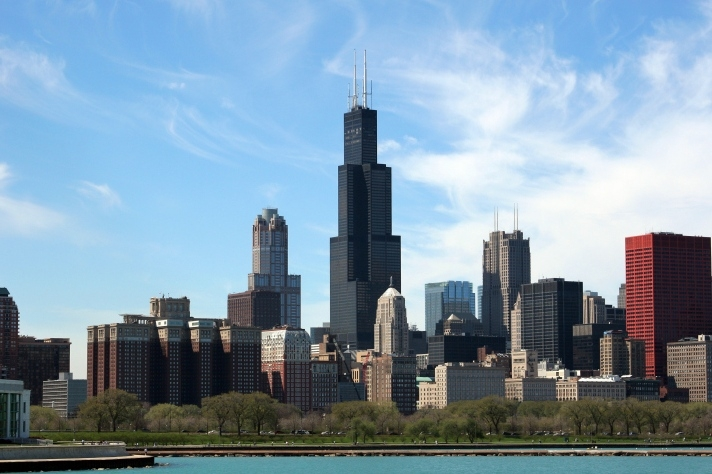

In [ ]:
# 콘텐츠(content) 이미지 출력
display_image('./chicago.jpg')

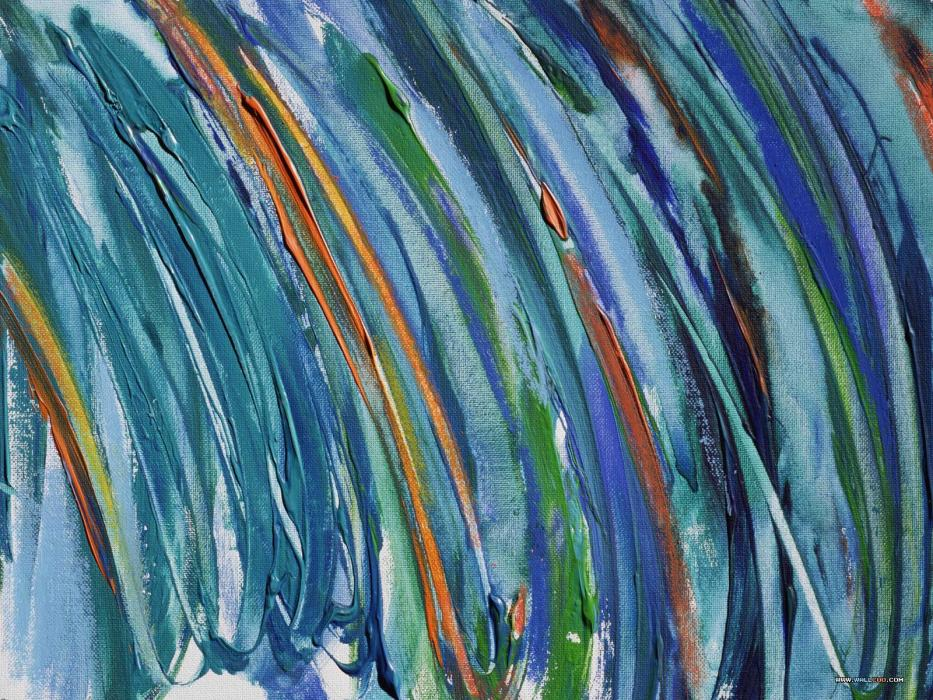

In [ ]:
# 스타일(style) 이미지 출력
display_image('./brushstrokes.jpg')

#### <b>스타일 전송(Style Transfer) 함수 구현</b>

* 최종적인 Style Transfer 함수를 구현합니다.

In [ ]:
def style_transfer(vgg, decoder, content, style, alpha=1.0):
    assert (0.0 <= alpha <= 1.0)
    content_f = vgg(content)
    style_f = vgg(style)
    feat = adaptive_instance_normalization(content_f, style_f)
    feat = feat * alpha + content_f * (1 - alpha)
    return decoder(feat)

* 이미지 전처리 함수를 구현합니다.

In [ ]:
def test_transform(size=512):
    transform_list = []
    if size != 0:
        transform_list.append(transforms.Resize(size))
    transform_list.append(transforms.ToTensor())
    transform = transforms.Compose(transform_list)
    return transform

content_tf = test_transform()
style_tf = test_transform()

#### <b>Style Transfer 실습 ①</b>

* <b>alpha</b> 파라미터를 조절하여 콘텐츠 비율을 증가시킬 수 있습니다.

In [ ]:
content_path = './chicago.jpg'
style_path = './brushstrokes.jpg'

content = content_tf(Image.open(str(content_path)))
style = style_tf(Image.open(str(style_path)))

style = style.to(device).unsqueeze(0)
content = content.to(device).unsqueeze(0)
with torch.no_grad():
    output = style_transfer(vgg, decoder, content, style, alpha=1.0)
output = output.cpu()

save_image(output, 'output.png')

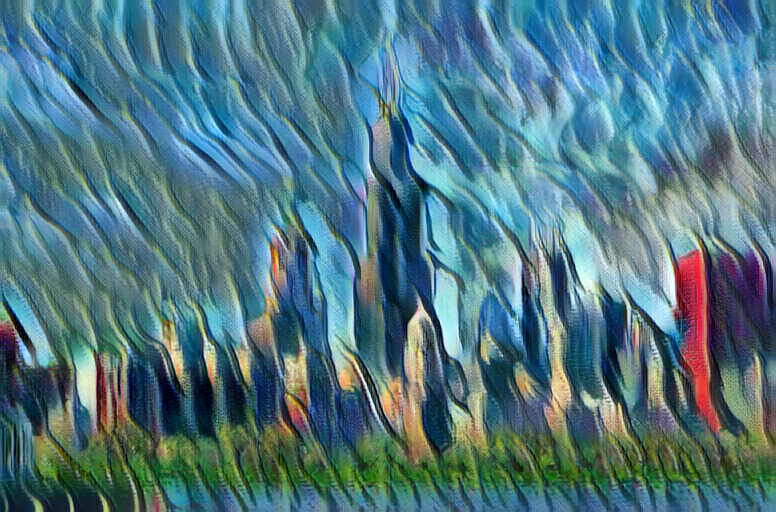

In [ ]:
# 결과 이미지 출력
display_image('./output.png')

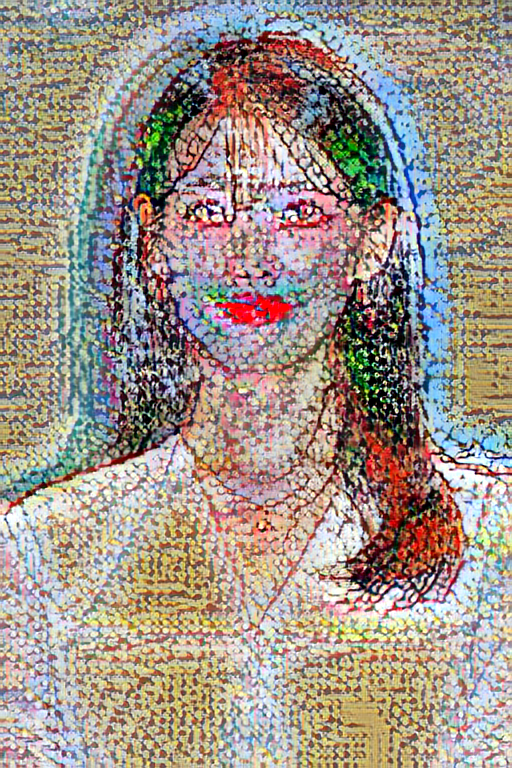

In [ ]:
content_path = './iu_content_1.jpg'
style_path = './plot_style.jpg'

content = content_tf(Image.open(str(content_path)))
style = style_tf(Image.open(str(style_path)))

style = style.to(device).unsqueeze(0)
content = content.to(device).unsqueeze(0)
with torch.no_grad():
    output = style_transfer(vgg, decoder, content, style, alpha=1.0)
output = output.cpu()

save_image(output, 'output.png')

# 결과 이미지 출력
display_image('./output.png')